In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### 1. Dataset

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 2. Modelo
De início, fazendo uso do modelo mencionado na página 356.

In [6]:
modelo = keras.Sequential([
    keras.layers.Conv2D(64, 7, activation = "relu", padding = "same", input_shape = [28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
    keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation = "relu", padding = "same"),
    keras.layers.Conv2D(256, 3, activation = "relu", padding = "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
])

In [7]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [8]:
modelo.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

##### 2.1 Treinamento

In [9]:
import numpy as np

np.random.seed(42)

In [10]:
treinamento = modelo.fit(train_images, train_labels, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1500/1500 [==============================] - 26s 8ms/step - loss: 0.3539 - accuracy: 0.8936 - val_loss: 0.0582 - val_accuracy: 0.9855
Epoch 2/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1207 - accuracy: 0.9715 - val_loss: 0.0687 - val_accuracy: 0.9851
Epoch 3/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0860 - accuracy: 0.9801 - val_loss: 0.0465 - val_accuracy: 0.9884
Epoch 4/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0744 - accuracy: 0.9831 - val_loss: 0.0488 - val_accuracy: 0.9900
Epoch 5/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0621 - accuracy: 0.9859 - val_loss: 0.0783 - val_accuracy: 0.9856
Epoch 6/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0563 - accuracy: 0.9869 - val_loss: 0.0477 - val_accuracy: 0.9901
Epoch 7/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0445 - accuracy: 0.9894 - val_loss: 0.0490 -

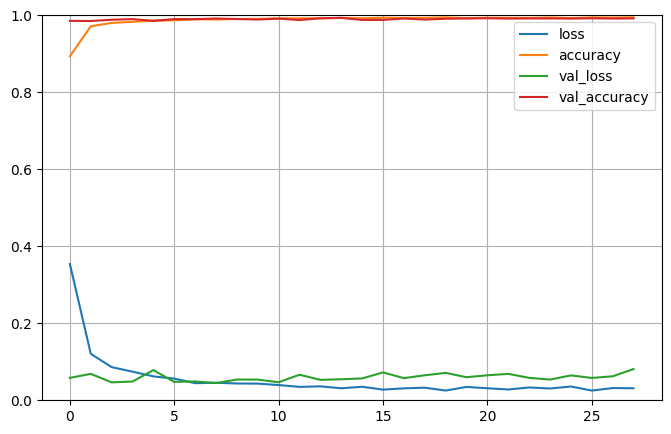

In [11]:
import pandas as pd

pd.DataFrame(treinamento.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Restringindo o Eixo y
plt.show()

In [12]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels, verbose=2)
print(f'\nResultado do Teste: {test_acc:.4f}')

313/313 - 1s - loss: 0.0313 - accuracy: 0.9921 - 1s/epoch - 4ms/step

Resultado do Teste: 0.9921
